## Basic data

In [3]:
import pandas as pd
import numpy as np
import os

df_stc = pd.read_parquet(r"C:\Users\victor\Documents\DeepLearning\FAA NLP Project\database\stc_metadata_and_text.parquet")

print(df_stc.shape)
df_stc = df_stc.drop(df_stc.index[[0]])
print(df_stc.shape)

start_dates = pd.to_datetime(pd.DataFrame({'year': np.linspace(1950, 2020, 8)})['year'], format="%Y").dt.date
end_dates = pd.to_datetime(pd.DataFrame({'year': np.linspace(1960, 2030, 8)})['year'], format="%Y").dt.date

(43818, 30)
(43808, 30)


In [4]:
list(df_stc)

['drs:chronicleId',
 'drs:status',
 'drs:primaryRespOffice',
 'drs:stcStatus',
 'drs:stcStatusDate',
 'drs:stcProductType',
 'drs:stcProductSubType',
 'drs:stcHolder',
 'drs:stcAddress',
 'drs:stcCountry',
 'drs:title',
 'drs:stcMake',
 'drs:stcTCNumbers',
 'drs:stcModel',
 'drs:stcTCNumbersMakeModel',
 'drs:partNumber',
 'drs:subPart',
 'drs:sectionNumber',
 'drs:ABReference',
 'drs:CARReference',
 'drs:EXReference',
 'drs:SFARReference',
 'drs:stcAplicationDate',
 'drs:comments',
 'docLastModifiedDate',
 'documentGuid',
 'documentURL',
 'descriptions',
 'limitations',
 'rawtext']

## Check Limitations and Descriptions statistics

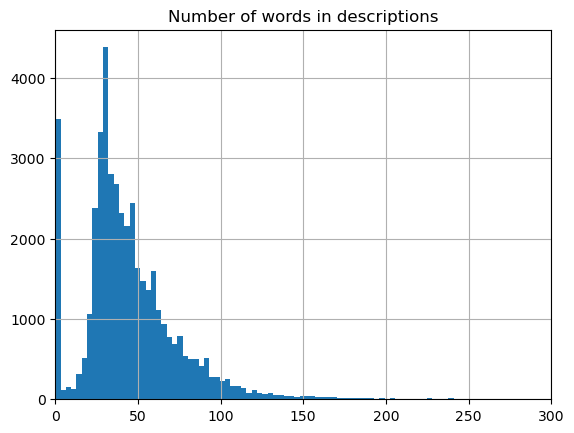

count    43808.000000
mean        45.886687
std         34.376243
min          0.000000
25%         28.000000
50%         39.000000
75%         58.000000
max       1285.000000
Name: descriptions totalwords, dtype: float64


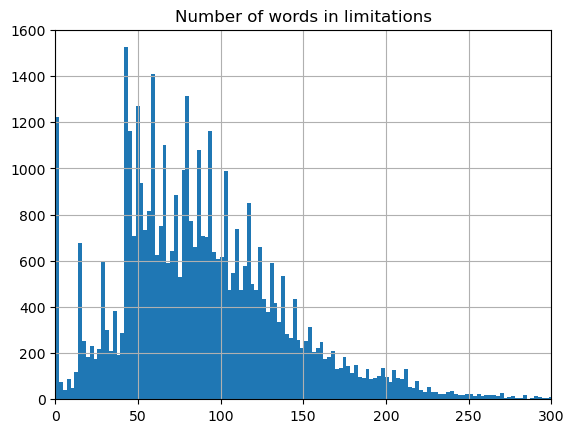

count    43808.000000
mean        91.006232
std         54.277106
min          0.000000
25%         54.000000
50%         83.000000
75%        118.000000
max        927.000000
Name: limitations totalwords, dtype: float64


In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = 6.4, 4.8

for content in ['descriptions', 'limitations']:
    df_stc[content+' totalwords'] = df_stc[content].str.split().str.len()
    df_stc[content+' totalwords'].hist(bins=400)
    plt.xlim(left=0, right=300)
    plt.title("Number of words in "+content)
    plt.show()
    print(df_stc[content+' totalwords'].describe())

In [6]:
import matplotlib.pyplot as plt
import numpy as np

for content in ['descriptions', 'limitations']:
    df_stc[content+' totalwords'] = df_stc[content].str.split().str.len()

(0.0, 300.0)

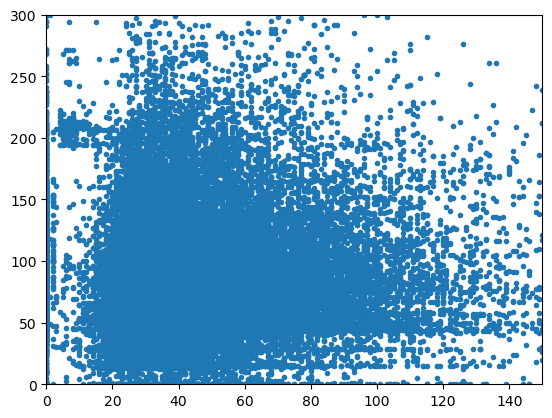

In [7]:
plt.plot(df_stc['descriptions totalwords'],df_stc['limitations totalwords'],'.')
plt.xlim([0,150])
plt.ylim([0,300])

### Cas non-fonctionnel pour debugger le décodeur regex de descriptions et limitations

In [19]:
import glob

df_stc_mini = df_stc[['drs:title','documentURL','descriptions totalwords','descriptions','limitations','limitations totalwords','documentGuid']]
#print(df_stc_mini.sort_values(by=['descriptions totalwords'], ascending=True).head())

n = 250
#print(df_stc_mini.sort_values(by=['descriptions totalwords'], ascending=True)['documentURL'].iloc[n])
documentGuid = df_stc_mini.sort_values(by=['limitations totalwords'], ascending=True)['documentGuid'].iloc[n]
print(documentGuid)

print(glob.glob(r'C:\Users\victor\Documents\DeepLearning\FAA NLP Project\database\data\stc\pdf\*'+documentGuid+'*')[-1])
print(glob.glob(r'C:\Users\victor\Documents\DeepLearning\FAA NLP Project\database\data\stc\text-from-pdf\*'+documentGuid+'*')[-1])

import subprocess
subprocess.Popen([glob.glob(r'C:\Users\victor\Documents\DeepLearning\FAA NLP Project\database\data\stc\pdf\*'+documentGuid+'*')[-1]], shell=True)
print(">>descriptions: "+df_stc_mini.sort_values(by=['limitations totalwords'], ascending=True)['descriptions'].iloc[n])
print(">>limitations: "+df_stc_mini.sort_values(by=['limitations totalwords'], ascending=True)['limitations'].iloc[n])

toto = df_stc_mini.sort_values(by=['descriptions totalwords'], ascending=True).iloc[n]

# with open(glob.glob(r'C:\Users\victor\Documents\DeepLearning\FAA NLP Project\database\data\stc\text-from-pdf\*'+documentGuid+'*')[-1],'rb') as f:
#     for line in f:
#         print(line)


800D5FCFC4CBF7E585256CC200122C86
C:\Users\victor\Documents\DeepLearning\FAA NLP Project\database\data\stc\pdf\SA5927SW__Current__800D5FCFC4CBF7E585256CC200122C86.pdf
C:\Users\victor\Documents\DeepLearning\FAA NLP Project\database\data\stc\text-from-pdf\SA5927SW__Current__800D5FCFC4CBF7E585256CC200122C86.txt
>>descriptions: 
>>limitations: 
